In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
# import cv2
from PIL import Image
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
# from tensorflow.keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
# from keras.applications import DenseNet121
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

In [2]:
train_data_path = 'Training'
test_data_path = 'Testing'

In [3]:
x_train = []
y_train = []
x_test = []
y_test = []

In [4]:
# Function to process images in a folder
def process_images(folder_path, images_list, labels_list):
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)
        if not os.path.isdir(class_path):
            continue
        
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            image = Image.open(image_path)
            
            # Convert the image to grayscale
            image = image.convert('L')
            
            # Resize the image to 64x64
            image = image.resize((64, 64))
            
            # Convert the image to a NumPy array
            image_array = np.array(image)
            
            # Normalize the image data (if needed)
            image_array = image_array / 255.0
            
            # Append the processed image and its label to the lists
            images_list.append(image_array)
            labels_list.append(class_folder)


In [5]:
# Process training images
process_images(train_data_path, x_train, y_train)

# Process testing images
process_images(test_data_path, x_test, y_test)

In [6]:
x_tr=[]
x_ts=[]
y_tr=[]
y_ts=[]

In [7]:
x_tr = np.array(x_train)
y_tr = np.array(y_train)

In [8]:
x_ts = np.array(x_test)
y_ts = np.array(y_test)

In [9]:
# # Convert the lists to NumPy arrays
# x_train = np.array(x_train)
# x_test = np.array(x_test)

In [10]:
x_tr.shape,y_tr.shape,x_ts.shape,y_ts.shape

((84096, 64, 64), (84096,), (21024, 64, 64), (21024,))

In [11]:
# Convert class labels to categorical format using one-hot encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_tr)
y_test_encoded = label_encoder.transform(y_ts)

onehot_encoder = OneHotEncoder(sparse=False)
y_tr1 = onehot_encoder.fit_transform(y_train_encoded.reshape(-1, 1))
y_ts1 = onehot_encoder.transform(y_test_encoded.reshape(-1, 1))

In [12]:
x_tr.shape,y_tr1.shape,x_ts.shape,y_ts1.shape

((84096, 64, 64), (84096, 5), (21024, 64, 64), (21024, 5))

In [13]:
# Reshape the data by adding an extra dimension
x_tr = np.expand_dims(x_tr, axis=-1)
x_ts = np.expand_dims(x_ts, axis=-1)

In [14]:
x_tr.shape,y_tr1.shape,x_ts.shape,y_ts1.shape

((84096, 64, 64, 1), (84096, 5), (21024, 64, 64, 1), (21024, 5))

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [16]:
# Define the shape of the input data
input_shape = (64, 64, 1)

# Define the number of classes
num_classes = 5

# Define the 2D CNN model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Flatten())
# Fully connected
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# Output layer
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 21, 21, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 21, 21, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

In [17]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
# Fit the model to the training data
history=model.fit(x_tr, y_tr1, batch_size=64, epochs=50)

Epoch 1/50
1314/1314 [==============================] - 143s 107ms/step - loss: 1.0578 - accuracy: 0.6129
Epoch 2/50
1314/1314 [==============================] - 141s 107ms/step - loss: 0.5999 - accuracy: 0.7843
Epoch 3/50
1314/1314 [==============================] - 145s 111ms/step - loss: 0.4751 - accuracy: 0.8267
Epoch 4/50
1314/1314 [==============================] - 142s 108ms/step - loss: 0.4096 - accuracy: 0.8504
Epoch 5/50
1314/1314 [==============================] - 143s 109ms/step - loss: 0.3725 - accuracy: 0.8647
Epoch 6/50
1314/1314 [==============================] - 141s 107ms/step - loss: 0.3496 - accuracy: 0.8728
Epoch 7/50
1314/1314 [==============================] - 141s 107ms/step - loss: 0.3308 - accuracy: 0.8796
Epoch 8/50
1314/1314 [==============================] - 139s 106ms/step - loss: 0.3124 - accuracy: 0.8861
Epoch 9/50
1314/1314 [==============================] - 141s 107ms/step - loss: 0.3044 - accuracy: 0.8879
Epoch 10/50
1314/1314 [=======================

In [19]:
# _, accuracy = model.evaluate(x_ts, y_ts1, batch_size=64, verbose=0)

In [20]:
# accuracy

In [21]:
prediction = model.predict(x_ts)

657/657 [==============================] - 13s 20ms/step


In [22]:
prediction_NN=np.argmax(prediction, axis=-1)

In [23]:
prediction_NN

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

In [24]:
y_ts1_1=np.argmax(y_ts1, axis=-1)

In [25]:
y_ts1_1

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

In [26]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_ts1_1, prediction_NN))

Accuracy =  0.9465848554033486


In [27]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_ts1_1, prediction_NN)
print(cm)

[[11798    26    13    67    22]
 [  189  1222     0    13   153]
 [   28     0  1498     0    10]
 [  295    12     0   741   213]
 [   17    15     5    45  4642]]


In [28]:
from sklearn.metrics import classification_report

# print(class_labels)
target_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']
print(classification_report(y_ts1_1, prediction_NN, target_names=target_names,digits=3))

              precision    recall  f1-score   support

     Class 0      0.957     0.989     0.973     11926
     Class 1      0.958     0.775     0.857      1577
     Class 2      0.988     0.975     0.982      1536
     Class 3      0.856     0.588     0.697      1261
     Class 4      0.921     0.983     0.951      4724

    accuracy                          0.947     21024
   macro avg      0.936     0.862     0.892     21024
weighted avg      0.945     0.947     0.943     21024



In [29]:
model.save('M3_copy_all_imgs_3lyr.h5')

In [30]:
import matplotlib.pyplot as plt

In [31]:
from mlxtend.plotting import plot_confusion_matrix

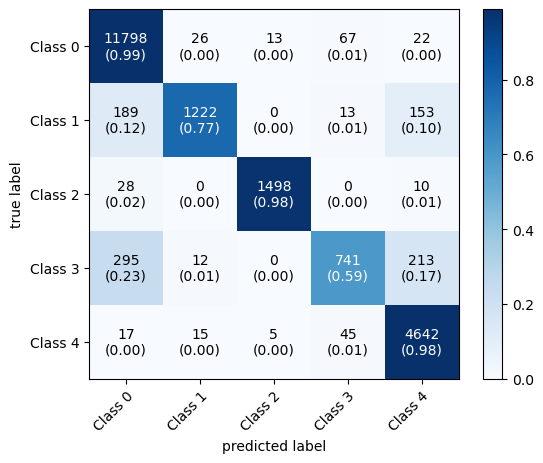

In [33]:
class_dict = {0: 'Class 0',
              1: 'Class 1',
              2: 'Class 2',
              3: 'Class 3',
              4: 'Class 4'}

multiclass = np.array([[11798,    26,    13,    67,    22],
                       [189,  1222,     0,    13,   153],
                       [28,     0,  1498,     0,    10],
                       [295,    12,     0,   741,   213],
                       [17,    15,     5,    45,  4642]])

fig, ax = plot_confusion_matrix(
    conf_mat=multiclass,
    class_names=class_dict.values(),show_normed=True,colorbar=True)